# Project on Customer Segmentation

### Domain: Retail

### Data set: Purchase at super market

#### Attributes of the data set:

1) Customer_ID : cust_id

2) AVG_Actual_price_12: avg_price

3) Purchase_Value: pur_val

4) No_of_Items: no_items

5) Total_Discount :tot_disc

6) MONTH_SINCE_LAST_TRANSACTION : mnth_trans

### Problem:

Customer Segmentation and recommendation based on the given attributes.

### Contents:

[1) Load data](#1)

[2) Exploration of data](#2)

[2 a) Who are the highest purchasing customers?](#2a)

[2 b) Who are getting highest discounts?](#2b)

[2 c) Let us try to understand the co-relations between different variables](#2c)

[3) Apply Machine Learning Unsupervised Algorithm](#3)

[3 a) Scaling](#3a)

[3 b) Elbow method](#3b)

[3 c) Kmeans clustering with **5 classes**](#3c)

[3 d) Plot the data with classes coded to see the separation between classes](#3d)

[3 e) Inference about the clusters](#3e)

[4) Conclusion](#4)

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
local_path='C:/SKCY/Python/MLA/'
np.random.seed(42)

In [ ]:
!dir C:\SKCY\Python\MLA            #contents in the folder

### 1) Load data<a name="1"></a>

In [3]:
col=['cust_id','avg_price','pur_val','no_item','tot_disc','mnth_trans_bf']       #Rename columns in shorter format
df_store=pd.read_csv(local_path+'Supermarket Purchase.csv',header=None, skiprows=1,names=col,index_col=0)
df_store.head()

,avg_price,pur_val,no_item,tot_disc,mnth_trans_bf
cust_id,,,,,
1,300.000000,1200.00,4,0.00,11
2,2563.282500,41012.52,16,78737.48,2
4,3510.000000,7020.00,2,780.00,4
8,4530.000000,13590.00,3,1510.00,1
9,2428.076923,33455.00,15,17445.00,6


In [4]:
df_store.tail()

,avg_price,pur_val,no_item,tot_disc,mnth_trans_bf
cust_id,,,,,
1002,2210.000,8840.00,4,11960.00,1
1003,2500.000,2500.00,1,0.00,5
1004,347.045,694.09,2,605.91,12
1005,3750.000,3750.00,1,3750.00,12
1006,4150.000,4150.00,1,4150.00,12


### 2) Exploration of data<a name="2"></a>

In [5]:
#Shape of the data
print('Size of the table',df_store.shape)

Size of the table (702, 5)


In [6]:
### Check missing data
print('No of missing data:\n',len(df_store)-df_store.count())

No of missing data:
 avg_price        0
pur_val          0
no_item          0
tot_disc         0
mnth_trans_bf    0
dtype: int64


In [7]:
df_store.describe() #basic stats

,avg_price,pur_val,no_item,tot_disc,mnth_trans_bf
count,702.000000,702.000000,702.000000,702.000000,702.000000
mean,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,10000.000000,302721.740000,172.000000,734349.820000,12.000000


#### 2 a) Who are the highest purchasing customers?<a name="2a"></a>

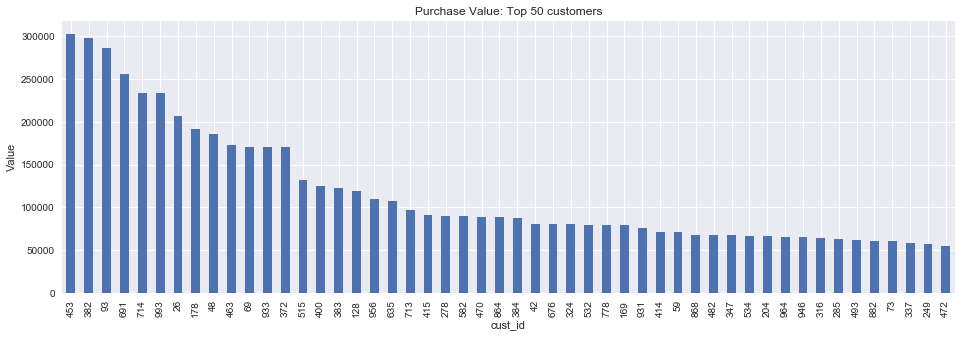

In [8]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=16,5          #figure size
df_store.sort_values('pur_val',ascending=False)['pur_val'].iloc[0:50].plot(kind='bar')   #plot top 50 cust
plt.title('Purchase Value: Top 50 customers')
plt.ylabel('Value')

#### 2 b) Who are getting highest discounts?<a name="2b"></a>

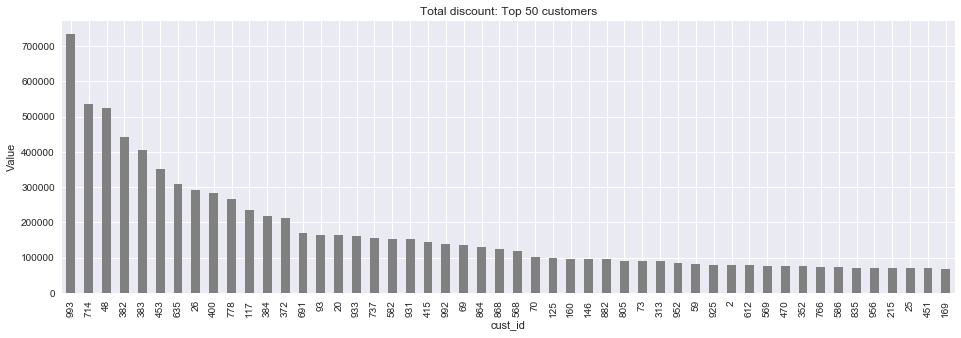

In [9]:
df_store.sort_values('tot_disc',ascending=False)['tot_disc'].iloc[0:50].plot(kind='bar',color='grey') #plot top 50 cust
plt.title('Total discount: Top 50 customers')
plt.ylabel('Value')

#### Observation:

It looks that the highest purchasing customers got maximum discount

#### 2 c) Let us try to understand the co-relations between different variables<a name="2c"></a>

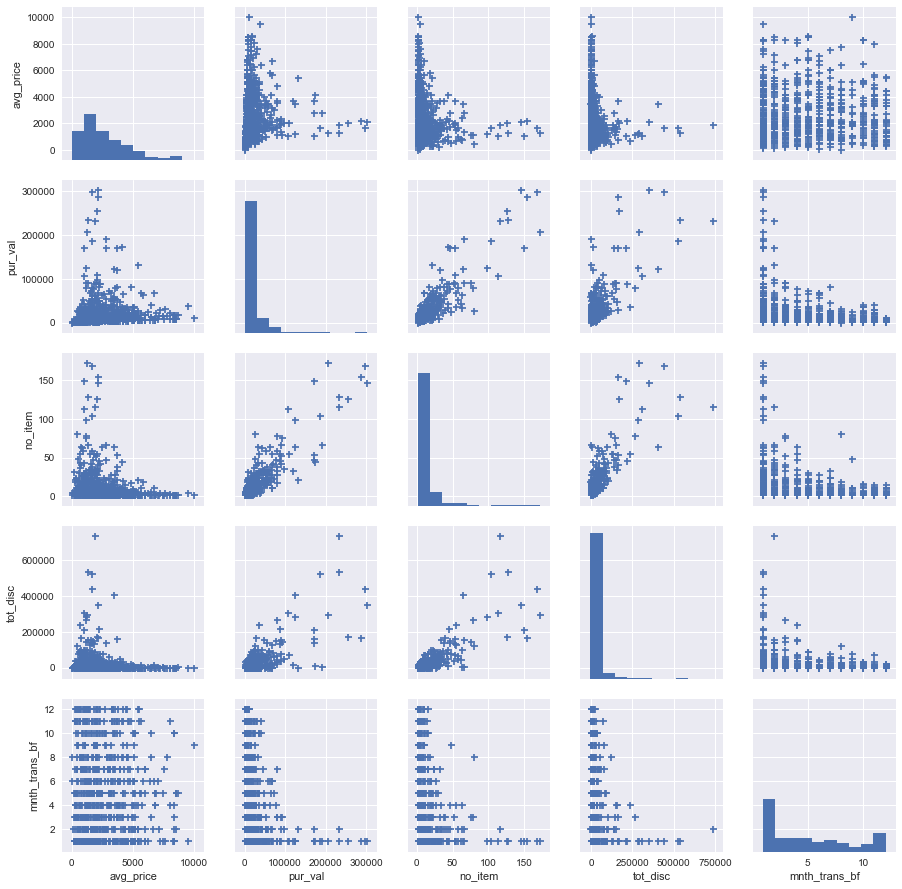

In [10]:
sns.pairplot(df_store,markers='+')          #pair plot using seaborn to understand relation between variables

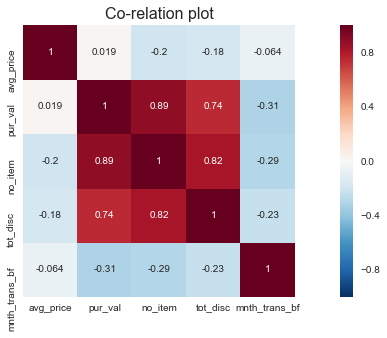

In [11]:
sns.heatmap(df_store.corr(),annot=True,square=True) #heatmap of seaborn to plot corelation value between variables
plt.title('Co-relation plot',fontsize=16)

### 3) Apply Machine Learning Unsupervised Algorithm<a name="3"></a>

In [12]:
from sklearn.cluster import KMeans                 #import Kmean package
from sklearn.preprocessing import scale             #import scaling package

#### 3a) Scaling of features are required as they are ranging in different scale<a name="3a"></a>

In [13]:
df_store_var=df_store.copy()         #create a copy to standardise

for i in df_store_var.columns.tolist():
    df_store_var[i]=scale(df_store_var[i].astype('float64'))

In [14]:
df_store_var.head()

,avg_price,pur_val,no_item,tot_disc,mnth_trans_bf
cust_id,,,,,
1,-1.247672,-0.537934,-0.335637,-0.356357,1.676849
2,-0.042388,0.612216,0.263643,0.992207,-0.851028
4,0.461776,-0.369799,-0.435517,-0.342998,-0.289277
8,1.004965,-0.179998,-0.385577,-0.330495,-1.131903
9,-0.114390,0.393885,0.213703,-0.057571,0.272473


#### 3b) Elbow method to find out number clusters required<a name="3b"></a>

In [15]:
# initialise with 20 classes and find out classes where total within cluster distance 
# does not change much using elbow methood

from scipy.spatial.distance import cdist       #import distance calculation package

meandist=[]               #initialise blank array
clusters=range(1,20)     #initialise for 40 classes

#loop for 20 classes
for k in clusters:
    model=KMeans(n_clusters=k)      #assign Kmeans 
    model.fit(df_store_var)         #fit the model
    clus_assign=model.predict(df_store_var)       #predict
    
    #calculate mean distance and append it to array
    meandist.append(sum(np.min(cdist(df_store_var,model.cluster_centers_,
                                     'euclidean'),axis=1))/df_store_var.shape[0])    

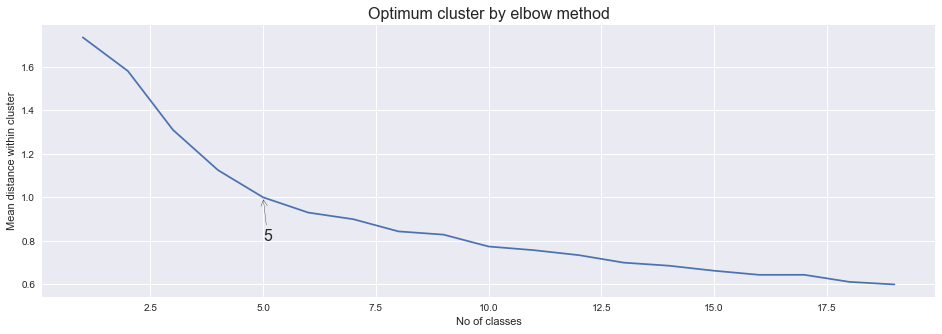

In [16]:
# Plot the elbow curve
plt.plot(clusters,meandist)
plt.title('Optimum cluster by elbow method',fontsize=16)
plt.xlabel('No of classes')
plt.ylabel('Mean distance within cluster')
plt.annotate('5',xy=(5,1),arrowprops=dict(arrowstyle='->'), xytext=(5, 0.8),fontsize=16)
#plt.axvline(5,color='black',linestyle='--')

#### Observation:

From the above elbow plot it looks that after 5 class the change of within cluster distance from centroid does not change much, hence <u>**5 classes**</u> are selected for clustering

#### 3c) Kmeans clustering with **5 classes**<a name="3c"></a>

In [17]:
model2=KMeans(n_clusters=5)       #initialise with 5 clusters
model2.fit(df_store_var)          #fit the model
clus_assgn_5=model2.predict(df_store_var)         #predict classes

In [18]:
from collections import Counter
print('Number of customers for each class:',str(Counter(clus_assgn_5))[7:])  #print data point count per class

Number of customers for each class: ({3: 261, 0: 224, 4: 137, 1: 68, 2: 12})


In [19]:
#join the class id in store table, used the non scaled data for better interpretation
df_store['class']=clus_assgn_5      
df_store.head()

,avg_price,pur_val,no_item,tot_disc,mnth_trans_bf,class
cust_id,,,,,,
1,300.000000,1200.00,4,0.00,11,0
2,2563.282500,41012.52,16,78737.48,2,1
4,3510.000000,7020.00,2,780.00,4,3
8,4530.000000,13590.00,3,1510.00,1,4
9,2428.076923,33455.00,15,17445.00,6,3


#### 3d) Plot the data with classes coded to see the separation between classes<a name="3d"></a>

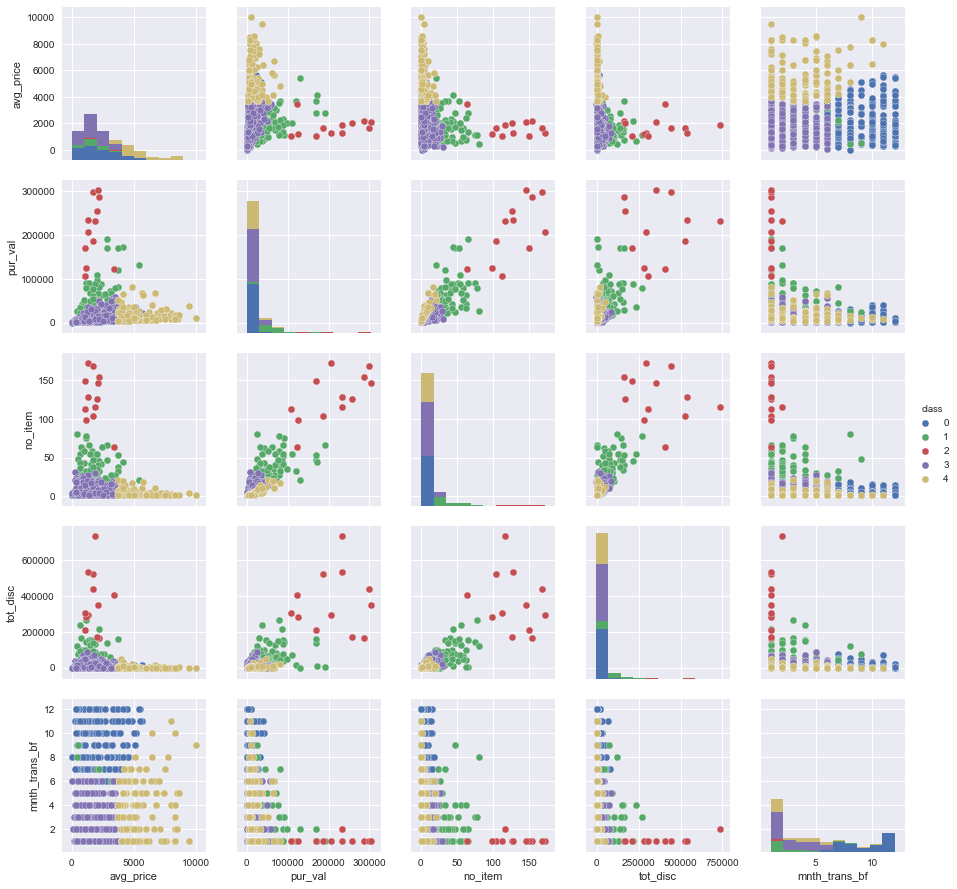

In [20]:
sns.pairplot(df_store,hue='class',vars=col[1:])

#### 3e) Inference about the clusters<a name="3e"></a>

Cluster centers of each cluster

In [34]:
df_store_piv=df_store.pivot_table(values=['avg_price','pur_val','no_item','tot_disc','mnth_trans_bf'],index='class')
np.round(df_store_piv,1)

,avg_price,mnth_trans_bf,no_item,pur_val,tot_disc
class,,,,,
0,2188.0,9.4,4.0,7622.6,6345.3
1,1840.6,2.4,38.8,63748.3,76315.9
2,1736.2,1.1,128.2,210805.7,368516.5
3,1748.7,2.9,7.5,11678.0,12388.3
4,5567.6,3.6,3.6,16745.4,2479.4


In [31]:
print('Number of customers each class:',df_store.groupby('class').count()['avg_price'])

Number of customers each class: class
0    224
1     68
2     12
3    261
4    137
Name: avg_price, dtype: int64


Boxplot to interpret each class

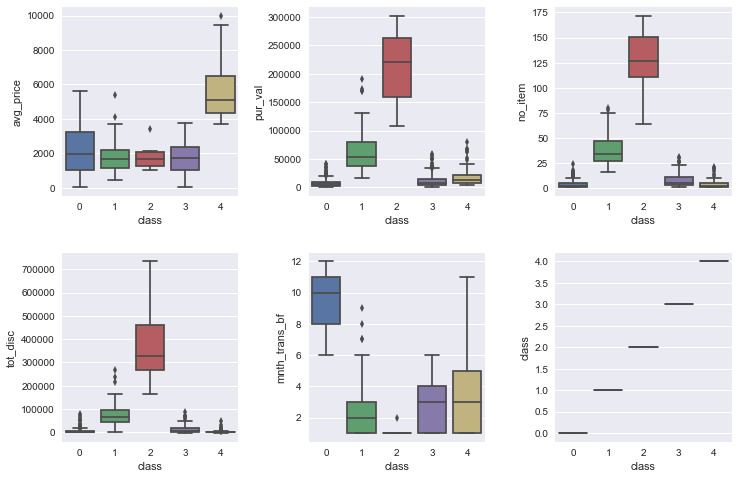

In [22]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.3,wspace=0.4)
for j,i in enumerate(df_store.columns.tolist()):
    plt.subplot(2,3,j+1)
    sns.boxplot(df_store['class'],df_store[i])

### 4) Conclusion:<a name="4"></a>

From the above study of Kmeans clustering technique applied on the store dataset there are 5 clear segmentation of classes are visible. Further study could be taken up on how to influence these 5 classes of customers with recommendation.

|ClassID||#of Customers||Inference|
|--||--||--|
|Class-0||228||1) Most non repetitive customer, 2) Gets low discount, 3) Purchase very less number of items, 4) But with good average price of product, 5) Least revenue generating customer|
|Class-1||68||1) Somewhat consistent, 2) Moderately discount hungry, 3) Purchase good number of items, 4) Good revenue generating customer, 5) On an average spends low per items|
|Class-2||12||1) Regular customer, 2) Purchase maximum number of items, 3) Most discount hungry, 4) Average price of items are very low, 5) Highest revenue generating customers|
|Class-3||261||1) Somewhat less consistent, 2) Gets moderate discount, 3) Purchase moderate number of items, 4) Low revenue generating customers, 5) Average price of items are low |
|Class-4||137||1) Less repetitive and less consistent, 2) Least discount hungry, 3) Takes lowest number of items, 4) Moderate revenue generating customers, 5) Spends on higher price ranged products|
